In [1]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14
import numpy as np

In [55]:
# Code for simuating the first differential equations
def Simulate(mu, beta, gamma, I_0, N, T,dt):
    t_range = np.linspace(0, T, int(T / dt))
    S_t = np.zeros(t_range.size)
    S_t[0] = N-I_0
    I_t = np.zeros(t_range.size)
    I_t[0] = I_0
    R_t = np.zeros(t_range.size)
    
    for i in range(1, t_range.size):
        S_t[i] = S_t[i-1] - (beta * (S_t[i-1] * I_t[i-1])/N) * dt
        I_t[i] = I_t[i-1] + (beta * (S_t[i-1] * I_t[i-1])/N - gamma*I_t[i-1])*dt
        R_t[i] = R_t[i-1] + (gamma * I_t[i-1])*dt
    
    plt.plot(t_range, S_t, label="S")
    plt.plot(t_range, I_t, label="I")
    plt.plot(t_range, R_t, label="R")
    plt.legend()



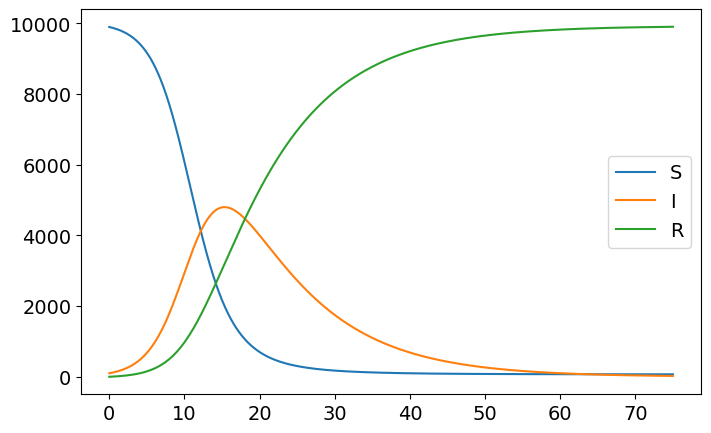

In [59]:
Simulate(0.15, .5, 0.1, 100, 10000, 75, .001)

Slower old code:

In [ ]:

#Slow, doesn't sue numpy; use the next big code block




a = 1.0 #The parameters a and b are defined in the paper, roughly half-way down page 13
b = 1.0
theta = 0.0

N = 1000
m = round(b*N**(1/3))
n = N - m


lambd = 1 + a*N**(-1/3)


U_T = [*range(1,N+1)]
finalT = [*range(0,2*N +1)]
scaledU = [i*(N**(-2/3)) for i in U_T]

Prob_of_T = [0]*(2*N+1)

def p_kj(k, j, lambd, n, theta, m):
 return lambd*(n - k - theta *(j-1))/(lambd*(n-k-theta*(j-1))  + (n + m)  )

def q_kj(k, j, lambd, n, theta, m):
 return 1-p_kj(k, j, lambd, n, theta, m)


W_j_1 = [1] + ([0]*(N +1))
W_j = W_j_1


for j in finalT:
  W_j = ([0]*(N +2))
#  for k in range((j-m)//2 + 1, n+1): #Recursive formula, begins at (j-m)//2 + 1, as for k below this, the formula is 0
  for k in range((j-m)//2 + 1, min([(j-m)//2 + n//8, n])): #Recursive formula, begins at (j-m)//2 + 1, as for k below this, the formula is 0
      W_j[k] = W_j_1[k-1]*p_kj(k-1, j, lambd, n, theta, m) + W_j_1[k]*q_kj(k, j, lambd, n, theta, m)
  if (j - m) % 2 == 0 and (j-1) >= 0:
    Prob_of_T[j] = (W_j_1[((j-m)//2)] * q_kj((j-m)/2, j, lambd, n, theta, m))
  else:
    Prob_of_T[j] = 0
  W_j_1 = W_j




plt.plot(scaledU, Prob_of_T[m%2:2*len(scaledU):2]) #This should look similar to figure 3a in the paper, as the parameters (not N) are the same - and, luckily, it does! 
plt.ylim([0, 1.1*max(Prob_of_T)]) #Note: Y-axis is probability mass, as the distribution is discrete. I've no idea how they got it to be density.
plt.xlim([0, 7])
plt.title(r"Distribution of Final Epidemic Size for $N$ = %d, $a$ = %f, $b$ = %f" %(N, a, b))

sum(Prob_of_T) #Just to confirm that the probabilities sum to ~1

Faster code for without vaccination:

In [182]:
import numpy as np

a = 3.0 #The parameters a and b are defined in the paper, roughly half-way down page 13
b = 0.5
theta = 0.0

N = 50000
m = round(b*N**(1/3))
n = N - m


lambd = 1 + a*N**(-1/3)


U_T = np.arange(1, N+1)
finalT = np.arange(0, 2*N + 1)
scaledU = U_T*(N**(-2/3))

Prob_of_T = np.zeros(2*N+1)

def p_kj(k, j, lambd, n, theta, m):
 return lambd*(n - k - theta *(j-1))/(lambd*(n-k-theta*(j-1))  + (n + m)  )

def q_kj(k, j, lambd, n, theta, m):
 return 1-p_kj(k, j, lambd, n, theta, m)


#W_j_1 = [1] + ([0]*(N +1))
Wj1_k = np.zeros(N+2)
Wj1_k[0] = 1
hell = 1- Wj1_k


k_k = np.arange(0, N+2)
k_k1 = np.concatenate([[0], np.arange(0, N+1)])

p_k1 = p_kj(k_k1, 0, lambd, n, theta, m)
q_k = q_kj(k_k, 0, lambd, n, theta, m)

for j in finalT:
  Wj1_k1 = Wj1_k[k_k1]
  Wj1_k1[0] = 0
  #Wj_k = ((Wj1_k1*(p_kj(k_k1, j, lambd, n, theta, m))) + (Wj1_k*(q_kj(k_k, j, lambd, n, theta, m)) ))*(k_k > ((j-m)//2))
  Wj_k = ((Wj1_k1*p_k1) + (Wj1_k*q_k) )*(k_k > ((j-m)//2))
  if (j - m) % 2 == 0 and (j-m) >= 0:
    Prob_of_T[j] = (Wj1_k[((j-m)//2)] * q_kj((j-m)/2, j, lambd, n, theta, m))
  Wj1_k = Wj_k


print("Done1")

plt.plot(scaledU, Prob_of_T[m%2:2*len(scaledU):2], label='N=50,000')  #This should look similar to figure 3a in the paper, as the parameters (not N) are the same - and, luckily, it does! 
plt.ylim([0, 1.1*max(Prob_of_T)]) #Note: Y-axis is probability mass, as the distribution is discrete. I've no idea how they got it to be density.
plt.xlim([0, 10])

N = 500000
m = round(b*N**(1/3))
n = N - m


lambd = 1 + a*N**(-1/3)


U_T = np.arange(1, N+1)
finalT = np.arange(0, 2*N + 1)
scaledU = U_T*(N**(-2/3))

Prob_of_T = np.zeros(2*N+1)

def p_kj(k, j, lambd, n, theta, m):
 return lambd*(n - k - theta *(j-1))/(lambd*(n-k-theta*(j-1))  + (n + m)  )

def q_kj(k, j, lambd, n, theta, m):
 return 1-p_kj(k, j, lambd, n, theta, m)


#W_j_1 = [1] + ([0]*(N +1))
Wj1_k = np.zeros(N+2)
Wj1_k[0] = 1
hell = 1- Wj1_k


k_k = np.arange(0, N+2)
k_k1 = np.concatenate([[0], np.arange(0, N+1)])

p_k1 = p_kj(k_k1, 0, lambd, n, theta, m)
q_k = q_kj(k_k, 0, lambd, n, theta, m)

print("starting2")
for j in finalT:
  Wj1_k1 = Wj1_k[k_k1]
  Wj1_k1[0] = 0
  #Wj_k = ((Wj1_k1*(p_kj(k_k1, j, lambd, n, theta, m))) + (Wj1_k*(q_kj(k_k, j, lambd, n, theta, m)) ))*(k_k > ((j-m)//2))
  Wj_k = ((Wj1_k1*p_k1) + (Wj1_k*q_k) )*(k_k > ((j-m)//2))
  if (j - m) % 2 == 0 and (j-m) >= 0:
    Prob_of_T[j] = (Wj1_k[((j-m)//2)] * q_kj((j-m)/2, j, lambd, n, theta, m))
  Wj1_k = Wj_k




plt.plot(scaledU, Prob_of_T[m%2:2*len(scaledU):2], label='N=500,000')  #This should look similar to figure 3a in the paper, as the parameters (not N) are the same - and, luckily, it does! 
plt.ylim([0, 1.1*max(Prob_of_T)]) #Note: Y-axis is probability mass, as the distribution is discrete. I've no idea how they got it to be density.
plt.xlim([0, 10])
plt.title(r"Distribution of Final Epidemic Size $a$ = %f, $b$ = %f" %(N, a, b))

plt.legend()
plt.show()




np.sum(Prob_of_T) #Just to confirm that the probabilities sum to ~1

KeyboardInterrupt: 

Code for with vaccination (can still run if $\theta = 0$ to get the same results as above, but runs slower):

965.4893846056301

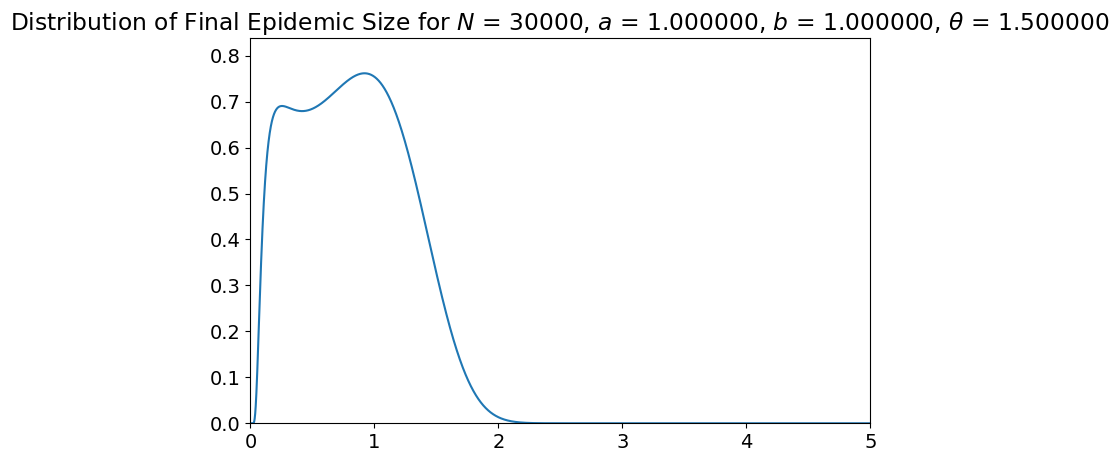

In [15]:

a = 1.0 #The parameters a and b are defined in the paper, roughly half-way down page 13
b = 1.0
theta = 1.5

N = 30000
m = round(b*N**(1/3))
n = N - m


lambd = 1 + a*N**(-1/3)


U_T = np.arange(1, N+1)
finalT = np.arange(0, 2*N + 1)
scaledU = U_T*(N**(-2/3))

Prob_of_T = np.zeros(2*N+1)

def p_kj(k, j, lambd, n, theta, m):
 return lambd*(n - k - theta *(j-1))/(lambd*(n-k-theta*(j-1))  + (n + m)  )

def q_kj(k, j, lambd, n, theta, m):
 return 1-p_kj(k, j, lambd, n, theta, m)

#W_j_1 = [1] + ([0]*(N +1))
Wj1_k = np.zeros(N+2)
Wj1_k[0] = 1
hell = 1- Wj1_k


k_k = np.arange(0, N+2)
k_k1 = np.concatenate([[0], np.arange(0, N+1)])

p_k1 = p_kj(k_k1, 0, lambd, n, theta, m)
q_k = q_kj(k_k, 0, lambd, n, theta, m)

for j in finalT:
  p_k1 = p_kj(k_k1, j, lambd, n, theta, m)
  q_k = q_kj(k_k, j, lambd, n, theta, m)
  Wj1_k1 = Wj1_k[k_k1]
  Wj1_k1[0] = 0
  #Wj_k = ((Wj1_k1*(p_kj(k_k1, j, lambd, n, theta, m))) + (Wj1_k*(q_kj(k_k, j, lambd, n, theta, m)) ))*(k_k > ((j-m)//2))
  Wj_k = ((Wj1_k1*p_k1) + (Wj1_k*q_k) )*(k_k > ((j-m)//2))
  if (j - m) % 2 == 0 and (j-m) >= 0:
    Prob_of_T[j] = (N**(2/3))*(Wj1_k[((j-m)//2)] * q_kj((j-m)/2, j, lambd, n, theta, m))
  Wj1_k = Wj_k




plt.plot(scaledU, Prob_of_T[m%2:2*len(scaledU):2])  #This should look similar to figure 3a in the paper, as the parameters (not N) are the same - and, luckily, it does! 
plt.ylim([0, 1.1*max(Prob_of_T)]) #Note: Y-axis is probability mass, as the distribution is discrete. I've no idea how they got it to be density.
plt.xlim([0, 5])
plt.title(r"Distribution of Final Epidemic Size for $N$ = %d, $a$ = %f, $b$ = %f, $\theta$ = %f " % (N, a, b, theta))

np.sum(Prob_of_T) #Just to confirm that the probabilities sum to ~1

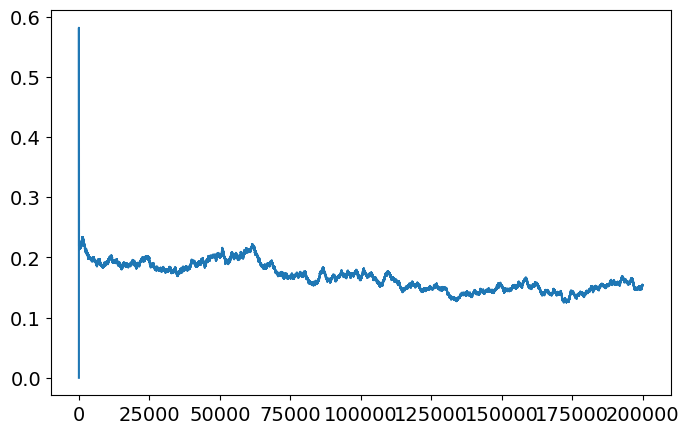

In [39]:
#Limit
from numpy.random import normal
from numpy import zeros
from math import sqrt,pi, e
a = 1.0 #The parameters a and b are defined in the paper, roughly half-way down page 13
b = 1.0
theta = 0

N = 100000
U_T = np.arange(1, N+1)
finalT = np.arange(0, 2*N + 1)
scaledU = U_T*(N**(-2/3))

dt = 0.01
T = 0
P = zeros(finalT.size)

def L(s,theta, b, a):
    return b + a * s -(1 + 2 *theta)*(s**2)/2

def N_pdf(x, mu, sigma):
    return (1/ ((sqrt(sigma) * sqrt(2 * pi))))  * e**(0.5 * ((x - mu)/(sqrt(sigma))**2))
def S(t,N):
    return t * N**(-2/3)
                                    
W = zeros(2*N + 1)



W[1] = sqrt(S(dt, N)) * normal(0, 2)
                                                
P[1] = N_pdf(W[1] - L(S(T,N), theta, b, a), 0, 2)
for i in range(2, P.size):
    W[i] = W[i-1] + sqrt(S(dt, N)) * normal(0, 2)
    P[i] = N_pdf(W[i-1] - L(S(T,N), theta, b, a), 0, 2)
    T += dt

plt.plot(finalT, P)
                                                


# I will simulate a Wiener process sqrt(2)dW


In [ ]:
import sys
!{sys.executable} -m pip install numpy

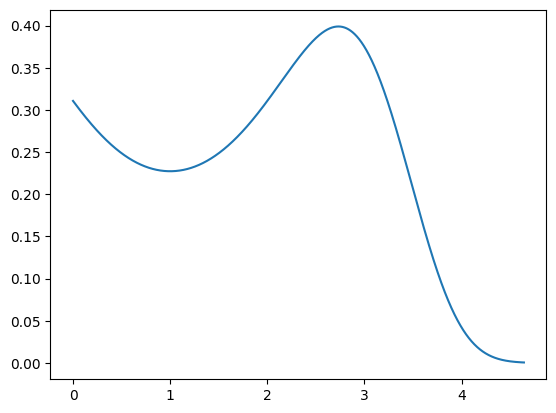

In [25]:
#Limit

from numpy.random import normal
from numpy import zeros
from numpy import arange
from math import sqrt,pi, e
from scipy.stats import norm
import matplotlib.pyplot as plt
a = 1.0 #The parameters a and b are defined in the paper, roughly half-way down page 13
b = 1.0
theta = 0

N = 100000
U_T = arange(1, N+1)
finalT = arange(0, 2*N + 1)
scaledU = U_T*(N**(-2/3))

dt = 0.01
T = 0
P = zeros(finalT.size*5)

def L(s,theta, b, a):
    return b + a * s -(1 + 2 *theta)*(s**2)/2

def N_pdf(x, mu, sigma):
    return (1/ ((sqrt(sigma) * sqrt(2 * pi))))  * e**(0.5 * ((x - mu)/(sqrt(sigma))**2))
def S(t,N):
    return t * N**(-2/3)

Ss = zeros(P.size)

for i in range(0, P.size):
    T+=dt
    P[i] = norm.pdf(-L(S(T,N), theta, b, a)/sqrt(2), 0, 1)
    Ss[i] = S(T,N)

plt.plot(Ss, P)
                                                


# I will simulate a Wiener process sqrt(2)dW


In [20]:
P.sum()


81692.98331170356

In [88]:
#Limit
from numpy.random import normal
from numpy import zeros, arange
from math import sqrt,pi, e
from numpy.random import seed

seed(98)
a = 1.0 #The parameters a and b are defined in the paper, roughly half-way down page 13
b = 1.0
theta = 0

N = 50000
U_T = arange(1, N+1)
finalT = arange(0, 2*N + 1)
scaledU = U_T*(N**(-2/3))

dt = 0.00001
T = 0
P = zeros(finalT.size)

def L(s,theta, b, a):
    return b + a * s -(1 + 2 *theta)*(s**2)/2

def S(t,N):
    return t * N**(-2/3)
                                    
W = zeros(10*N + 1)
Ls = zeros(W.size)
Ls[0] = L(0, theta, b, a)
Ss = zeros(W.size)

W[0] = sqrt(S(dt, N)) * normal(0, 2)
T = zeros(W.size)  
collided = False
collisions = 
i=0

while len(collisions) < 5:
    i+=1
    W[i] = W[i-1] + sqrt(dt) * normal(0, 2)
    T[i] = T[i-1] + dt
    
    S_t = S(T[i], N)
    L_i = L(T[i], theta, b, a)
    
    Ls[i] = L_i
    if W[i] <= L_i+0.01 and W[i] >= L_i-0.01:
    #    i=0
        collisions.append((S_t, W[i]))
    Ss[i] = S_t 

plt.scatter(collisions)


TypeError: scatter() missing 1 required positional argument: 'y'

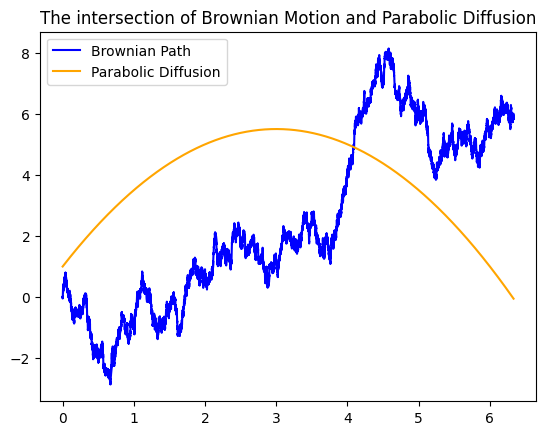

IndexError: index 42217 is out of bounds for axis 0 with size 42217

In [177]:
#Limit
from numpy.random import normal
from numpy import zeros, arange
from math import sqrt,pi, e
from numpy.random import seed

seed(91)
a = 3.0 #The parameters a and b are defined in the paper, roughly half-way down page 13
b = 1.0
theta = 0

N = 9000
U_T = arange(1, N+1)
finalT = arange(0, 2*N + 1)
scaledU = U_T*(N**(-2/3))

dt = 0.00015
T = 0
P = zeros(finalT.size)

def L(s,theta, b, a):
    return b + a * s -(1 + 2 * theta)*(s**2)/2

def S(t,N):
    return t * N**(-2/3)
                                    
W = zeros(10*N + 1)
Ls = zeros(W.size)
Ls[0] = L(0, theta, b, a)
Ss = zeros(W.size)

W[0] = sqrt(S(dt, N)) * normal(0, 2)
T = zeros(W.size)  
collided = False
collisions = []
collisions_t = zeros(W.size)
i=0

while len(collisions) < 1000:
    i+=1
    try:
        W[i] = W[i-1] + sqrt(dt) * normal(0, 2)
    except:
        print("Missed")
        i=0
        continue
    T[i] = T[i-1] + dt
    
    S_t = S(T[i], N)
    L_i = L(i*dt, theta, b, a)
    i_c = 0
    Ls[i] = L_i
    if W[i] <= L_i+0.012 and W[i] >= L_i-0.012:
        if (len(collisions)+1) % 50 == 0:
            print(len(collisions)+1)
        collisions.append((S_t, W[i]))
        

        
        i_0 = i
        while i_0 < i + 15000:
            L_i = L(i_0*dt, theta, b, a)
            Ls[i_0] = L_i
            W[i_0] = W[i_0-1] + sqrt(dt) * normal(0, 2)
            
            T[i_0] = T[i_0-1] + dt
            i_0+=1

        T = [t for t in T if t != 0]
        W = W[0:len(T)]
        Ls = Ls[0:len(T)]
        
        plt.plot(T, W, color='blue', label='Brownian Path')
        plt.plot(T, Ls, color='orange',label='Parabolic Diffusion')
        plt.legend()
        plt.title("The intersection of Brownian Motion and Parabolic Diffusion")
        collisions_t[i] += 1
        plt.show()


    Ss[i] = S_t 
    

bins = []
bin_size = 0.1
bin_width = int(bin_size / dt)

#curr_bin
for j in range(0, T.size, bin_width):
    bins.append(sum(collisions_t[j : j+bin_width]))
print(bins)


plt.plot([i for i in range(len(bins))], bins)

#plt.plot(T,collisions_t)


In [ ]:
#Limit
from numpy.random import normal
from numpy import zeros, arange
from pandas import Series
from math import sqrt,pi, e
from numpy.random import seed
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline


def savitzky_golay(y, window_size, order, deriv=0, rate=1):

    import numpy as np
    from math import factorial
    
    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

N_COLLISIONS = 8000
seed(98)
a = 1.0 #The parameters a and b are defined in the paper, roughly half-way down page 13
b = 1.5
theta = 0

N = 363000
U_T = arange(1, N+1)
finalT = arange(0, 2*N + 1)
scaledU = U_T*(N**(-2/3))

dt = 0.00003
T = 0
P = zeros(finalT.size)

def L(s,theta, b, a):
    return b + a * s -(1 + 2 * theta)*(s**2)/2

def S(t,N):
    return t * N**(-2/3)
                                    
W = zeros(N + 1)
Ls = zeros(W.size)
Ls[0] = L(0, theta, b, a)
Ss = zeros(W.size)

W[0] = sqrt(S(dt, N)) * normal(0, 2)
T = zeros(W.size)  
collided = False
collisions = []
collisions_t = zeros(W.size)
i=0
while len(collisions) < N_COLLISIONS:
    i+=1
    
    try:
        W[i] = W[i-1] + sqrt(dt) * normal(0, 2)
        
    except:
        print("Missed")
        i=0

        continue
    T[i] = T[i-1] + dt
    
    S_t = S(T[i], N)
    L_i = L(i*dt, theta, b, a)
    
    Ls[i] = L_i
    if W[i] <= L_i+0.0065 and W[i] >= L_i-0.0065:
        if (len(collisions)+1) % 50 == 0:
            print(len(collisions)+1)
        collisions.append((S_t, W[i]))
        collisions_t[i] += 1
        i=0
    Ss[i] = S_t 
    

bins = []
bin_size = 0.01
bin_width = int(bin_size / dt)


#curr_bin
for j in range(0, T.size, bin_width):
    bins.append(sum(collisions_t[j : j+bin_width]))
print(bins)

s = sum(bins)
bins = [b*((N/90)**(2/3)) / s for b in bins]


plt.plot([i for i in range(len(bins))], bins, label="Raw")
plt.plot([i for i in range(len(bins))], savitzky_golay(bins, 131,3), label="interp",color='black')
plt.legend()
plt.title("Limit Distribution of Final Epidemic Size a=1.000 b=1.000")
plt.show()
#plt.plot(T,collisions_t)
